module 'kv_template' has no attribute 'dataset_info'
Loaded dataset with 1427 elements
loading model: /root/autodl-fs/chatglm2


INFO:accelerate.utils.modeling:We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

/root/autodl-fs/chatglm2 model loaded
Using noise_level 0.050628662109375 to match model times 3.0


Causal tracing...: 100%|██████████| 3/3 [01:17<00:00, 25.87s/it]

Restoring state


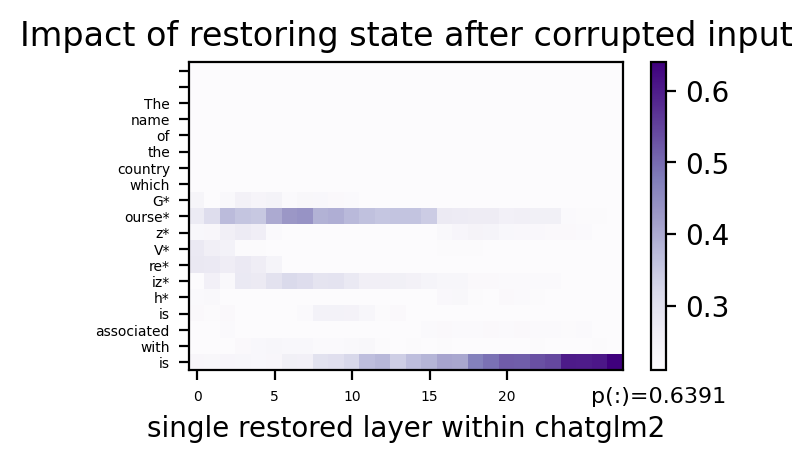

Restoring Attn


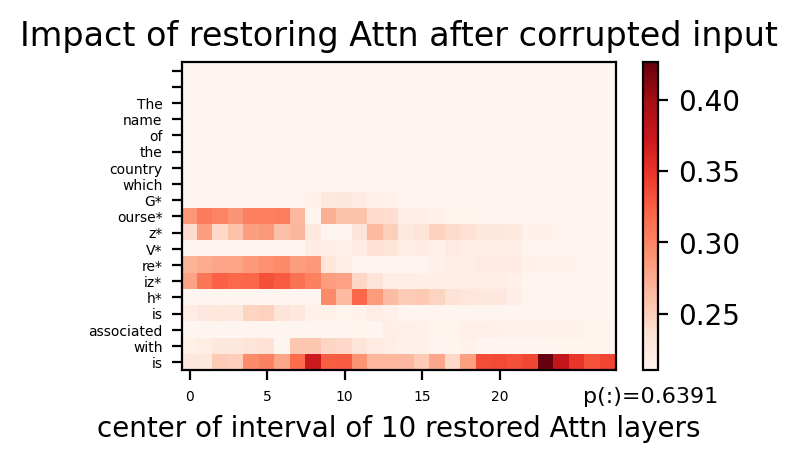

Restoring MLP


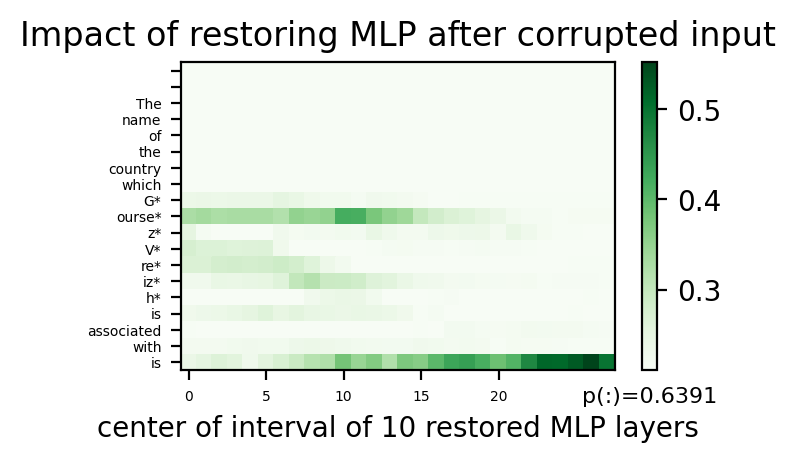

{'origin_data': {'model_output': ':', 'prob': 0.63916015625, 'tokens': ['', '', 'The', 'name', 'of', 'the', 'country', 'which', 'G', 'ourse', 'z', 'V', 're', 'iz', 'h', 'is', 'associated', 'with', 'is'], 'subject range': (8, 15), 'Restoring state score': [[0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125], [0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.2100830078125, 0.21008300

In [1]:
from diagnose import diagnose
from dataset_process import knowns, ZsRE, counterfact
from models import llama, gptj, gpt2, qwen, chatglm2, internlm, baichuan
from methods import causal_trace

# dataset = knowns.KnownsDataset(loc=knowns.default_loc)
# sample = knowns.get_processed_kvs(dataset[0], kn.requires_input_keys)
# dataset = ZsRE.ZsREDataset(loc=ZsRE.default_loc)
# sample = ZsRE.get_processed_kvs(dataset[0], kn.requires_input_keys)
dataset = counterfact.CounterfactDataset(loc=counterfact.default_loc)
sample = counterfact.get_processed_kvs(dataset[0], causal_trace.requires_input_keys)
result = diagnose.diagnosing(sample=sample, model_name_or_path=chatglm2, method=causal_trace.name)

import os
from IPython.display import display, Image
for img_info in result["image"]:
    image_path = img_info["image_path"]
    image_name = img_info["image_name"]
    if os.path.exists(image_path):
        print(f"{image_name}")
        display(Image(filename=image_path))
print(result)
